# Doctors and Clinicians Quality Payment Program PY 2018 Clinician Public Reporting: Overall MIPS Performance Exploratory Analysis 

## Created by Sundus Housah



In [1]:
# Import libraries to access functions and methods 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Read data from csv file and show the first few raws 
data = pd.read_csv('dataset.csv')
data.head()

C:\Users\Sundus.Housah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,npi,org_pac_id,lst_nm,frst_nm,medical speciality,source,quality_category_score,pi_category_score,cost_category_score,ia_category_score,final_mips_score
0,1.003028e+09,NaN,KATZ,KENNETH,NEUROLOGY,individual,97.8,90.0,82.1,40.0,100.0
1,1.003029e+09,NaN,HEIDARI,NEDA,GYNECOLOGYS,individual,63.9,72.0,NaN,40.0,79.6
2,1.003057e+09,NaN,COX,ALAN,PEDIATRICS,individual,33.3,0.0,NaN,0.0,30.0
3,1.003080e+09,NaN,KELLETI,ARUNASRI,DERMATOLOGY,apm,99.4,100.0,NaN,40.0,100.0
4,1.003220e+09,NaN,NAUMOVA,YULIA,FAMILY MEDICINE,individual,0.0,0.0,NaN,0.0,0.0


**Explore data shape, datatypes, information and generate general statistics for insight inspiration**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   npi                      889593 non-null   float64
 1    org_pac_id              885736 non-null   float64
 2    lst_nm                  889568 non-null   object 
 3    frst_nm                 889572 non-null   object 
 4   medical speciality       1048575 non-null  object 
 5    source                  889593 non-null   object 
 6    quality_category_score  882096 non-null   float64
 7    pi_category_score       697619 non-null   float64
 8    cost_category_score     364871 non-null   float64
 9    ia_category_score       889566 non-null   float64
 10   final_mips_score        889593 non-null   float64
dtypes: float64(7), object(4)
memory usage: 72.0+ MB


In [4]:
data.describe()

,npi,org_pac_id,quality_category_score,pi_category_score,cost_category_score,ia_category_score,final_mips_score
count,8.895930e+05,8.857360e+05,882096.000000,697619.000000,364871.000000,889566.000000,889593.000000
mean,1.499682e+09,4.937344e+09,82.584952,90.749016,75.337865,38.150064,87.001200
std,2.877999e+08,2.867143e+09,29.302673,26.423558,19.759009,8.134091,23.893453
min,1.003000e+09,4.210084e+07,0.000000,0.000000,23.200000,0.000000,0.000000
25%,1.245781e+09,2.466366e+09,79.100000,100.000000,62.900000,40.000000,86.400000
50%,1.497966e+09,4.880640e+09,99.200000,100.000000,76.800000,40.000000,99.600000
75%,1.740662e+09,7.416049e+09,100.000000,100.000000,92.500000,40.000000,100.000000
max,1.993000e+09,9.931497e+09,100.000000,100.000000,100.000000,40.000000,100.000000


In [5]:
#Checking missing values in each column
data.isnull().sum()

npi                        158982
 org_pac_id                162839
 lst_nm                    159007
 frst_nm                   159003
medical speciality              0
 source                    158982
 quality_category_score    166479
 pi_category_score         350956
 cost_category_score       683704
 ia_category_score         159009
 final_mips_score          158982
dtype: int64

In [6]:
data[' source'].unique()

array(['individual', 'apm', 'group', 'virtual group', nan], dtype=object)

**Cleaning data by removing un necessary columns, converting columns to proper data types** 

In [7]:
clean_data=data.copy()

In [8]:
#Replacing missing data in needed columns for insights with mean and checking for results
clean_data[' quality_category_score'] = clean_data[' quality_category_score'].fillna((clean_data[' quality_category_score'].mean()))
clean_data[' pi_category_score'] = clean_data[' pi_category_score'].fillna((clean_data[' pi_category_score'].mean()))
clean_data[' cost_category_score'] = clean_data[' cost_category_score'].fillna((clean_data[' cost_category_score'].mean()))
clean_data[' ia_category_score'] = clean_data[' ia_category_score'].fillna((clean_data[' ia_category_score'].mean()))
clean_data[' final_mips_score'] = clean_data[' final_mips_score'].fillna((clean_data[' final_mips_score'].mean()))
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   npi                      889593 non-null   float64
 1    org_pac_id              885736 non-null   float64
 2    lst_nm                  889568 non-null   object 
 3    frst_nm                 889572 non-null   object 
 4   medical speciality       1048575 non-null  object 
 5    source                  889593 non-null   object 
 6    quality_category_score  1048575 non-null  float64
 7    pi_category_score       1048575 non-null  float64
 8    cost_category_score     1048575 non-null  float64
 9    ia_category_score       1048575 non-null  float64
 10   final_mips_score        1048575 non-null  float64
dtypes: float64(7), object(4)
memory usage: 72.0+ MB


In [9]:
# Converting source column data type into catagory.
clean_data[' source']=clean_data[' source'].astype('category')
clean_data[' source'].dtype

CategoricalDtype(categories=['apm', 'group', 'individual', 'virtual group'], ordered=False)

### Data Structure 
**The data consists of 11 columns 7 of them are numric and 4 are string, also 1048575 raws where some are missing values. Columns (quality_category_score, pi_category_score, cost_category_score, ia_category_score, final_mips_score) missing values  are filled with means.The source column is a catagorial variable.The rest of the columns will be ignored as they have no use for the insights.** 


### Main features of interest 
* **What medical specialities need improvement activities according to quality_category_score?** <br>
* **Is applyieng mips standerds affectaive in imporoving the mips score?**

### Features that support insght  investigation
**quality_category_score,final_mips_score,medical speciality and source.By investigating the relation between the scores achieved by each medical specialty I will be able to understand which departments are applying best practices. Also, checking the high scores of mips are they necessarily high in all features?!**

## Univariate Exploration

 **looking at the distribution of the main variables of interest**

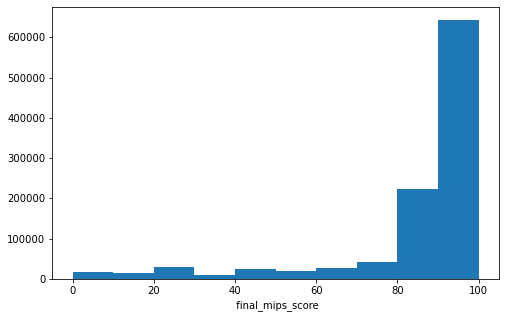

In [10]:
# plotting mips_scores
plt.figure(figsize=[8, 5])
plt.hist(data = clean_data, x = ' final_mips_score')
plt.xlabel(' final_mips_score')
plt.show()

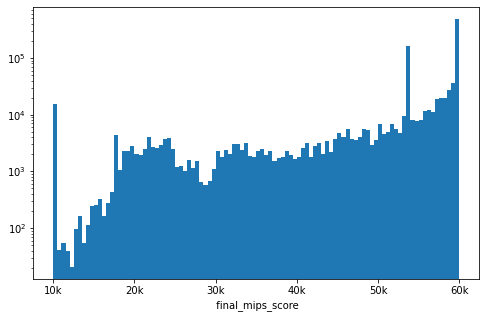

In [11]:
# Create log scale for closer understanding for the data distribution
plt.figure(figsize=[8, 5])
plt.hist(data = clean_data, x = ' final_mips_score',bins=100)
plt.yscale('log')
plt.xticks([0, 20, 40, 60, 80, 100], [ '10k', '20k', '30k', '40k', '50k','60k'])
plt.xlabel(' final_mips_score')
plt.show()

**In the first generated histogram we can see that the data is skewed to the left and most data is almost 100 in value, however after generating logarithmic scale histogram for the data I figured four different peaks. The first peak shows that over 100000 data are valued 10k where less than that are almost 18k, in addition over 1000000  data are valued 55k and 60k.**

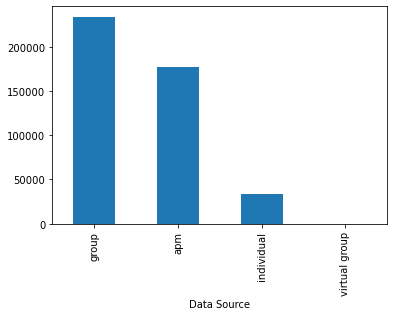

In [12]:
# plotting source
source_plt = clean_data[' source'].sample(frac=0.5, replace=True, random_state=1)
source_plt.value_counts().plot(kind='bar');
plt.xlabel('Data Source');

**Most scores are gathered from groups which means clinicians participated in groups, however my eyes are focused on apm sources as this applies standards mips standards. This will help me understand whether applying certain standards will help clinicians achieve higher performance scores or not.**

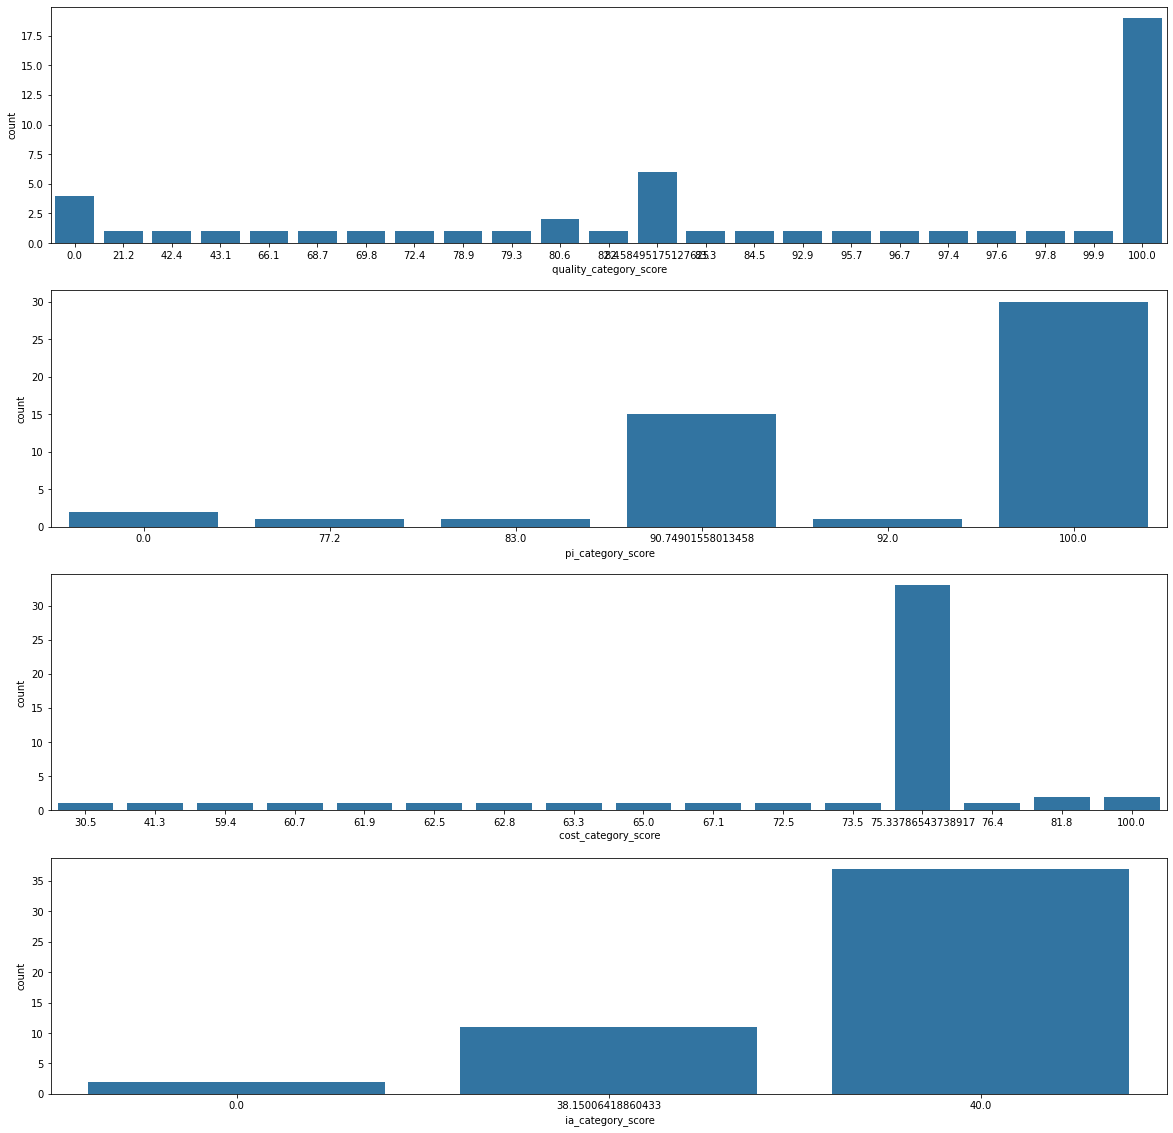

In [13]:
#Plotting scores together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=4, figsize = [20,20])

default_color = sb.color_palette()[0]
sb.countplot(data = clean_data.sample(50), x = ' quality_category_score', color = default_color,ax = ax[0])
sb.countplot(data = clean_data.sample(50), x = ' pi_category_score', color = default_color, ax = ax[1])
sb.countplot(data = clean_data.sample(50), x = ' cost_category_score', color = default_color, ax = ax[2])
sb.countplot(data = clean_data.sample(50), x = ' ia_category_score', color = default_color, ax = ax[3])


plt.show()

**Most clinicians achieved 100 quality score which is the full score and successfully submitted their reports indicated hight interoperability . Cost wise, the majority are costing 75.33. Unfortunately most participants need improvement activities as they did not achieve more than 40 which is the score that demands improvement process**

In [14]:
# Cheking for outliers according to plots.
quality_outliers = (clean_data[ ' quality_category_score'] < 100) | (clean_data[' pi_category_score'] < 90) | (clean_data[' ia_category_score'] < 38)
print(quality_outliers.sum())
print(clean_data.loc[quality_outliers,:])

668912
                  npi   org_pac_id   lst_nm   frst_nm medical speciality  \
0        1.003028e+09          NaN     KATZ   KENNETH          NEUROLOGY   
1        1.003029e+09          NaN  HEIDARI      NEDA        GYNECOLOGYS   
2        1.003057e+09          NaN      COX      ALAN         PEDIATRICS   
3        1.003080e+09          NaN  KELLETI  ARUNASRI        DERMATOLOGY   
4        1.003220e+09          NaN  NAUMOVA     YULIA    FAMILY MEDICINE   
...               ...          ...      ...       ...                ...   
1048570           NaN          NaN      NaN       NaN     ANESTHESIOLOGY   
1048571           NaN          NaN      NaN       NaN     REHABILITATION   
1048572           NaN          NaN      NaN       NaN          NEUROLOGY   
1048573           NaN          NaN      NaN       NaN     REHABILITATION   
1048574           NaN          NaN      NaN       NaN     REHABILITATION   

             source   quality_category_score   pi_category_score  \
0        ind

**According to the plots, it seams like high mips score achiever still need improvement activities as it seems the did not pass 40 in ia scores. However that is not the case for pi, where we can see clinicians are achieving high scores in both.**


### Distributions discussions
* **The mips feature distribution was a multimodal distribution where several peaks appeared in the log scale transformation figure around 10k,18k,55k and 60k.** <br>
* **The source showed that most data where collected from groups, however my main concern was the apm source where participants committed to mips standards, the amount of apm data is quite enough to generate solid evidence.** 

###  Investigated features
* **I can infer a direct relation between quality_category_score and pi_category_score is they both indicate that good quality means good performance but that is not the case between quality_category_score and ia_category_score, good work will still need improvement activities.**
* **The dataset was cleaned by filling missing data by mean and that was only done for the needed features to be able to have as possible accurate measures as possible .The source column data type was converted from object to categorical in order to perform clear plots and overcome coding issues.**


## Bivariate Exploration

**Take a close look at the correalation between scores and midical specialty**

In [15]:
numeric = [' final_mips_score',' quality_category_score',' pi_category_score',' ia_category_score']
categoric = ['midical specialty']

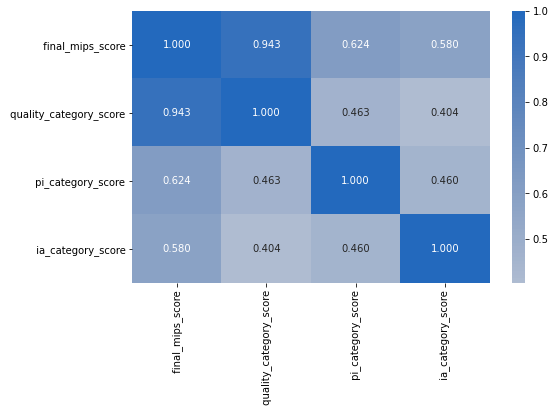

In [16]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(clean_data[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

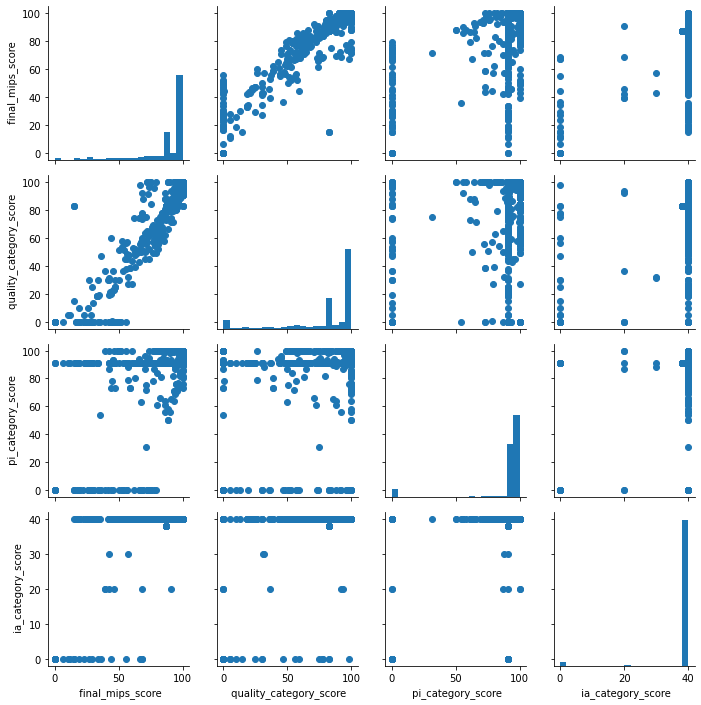

In [24]:
bimap = sb.PairGrid(data = clean_data.sample(1000), vars = numeric)
bimap = bimap.map_diag(plt.hist, bins = 20);
bimap.map_offdiag(plt.scatter);

**There is a high positive correlation between the mips and quality scores which makes us understand that clinicians who have high quality performance will achieve high mips scores, however that is not the case with improvement activities.**

C:\Users\Sundus.Housah\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Sundus.Housah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sundus.Housah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1800x1800 with 0 Axes>

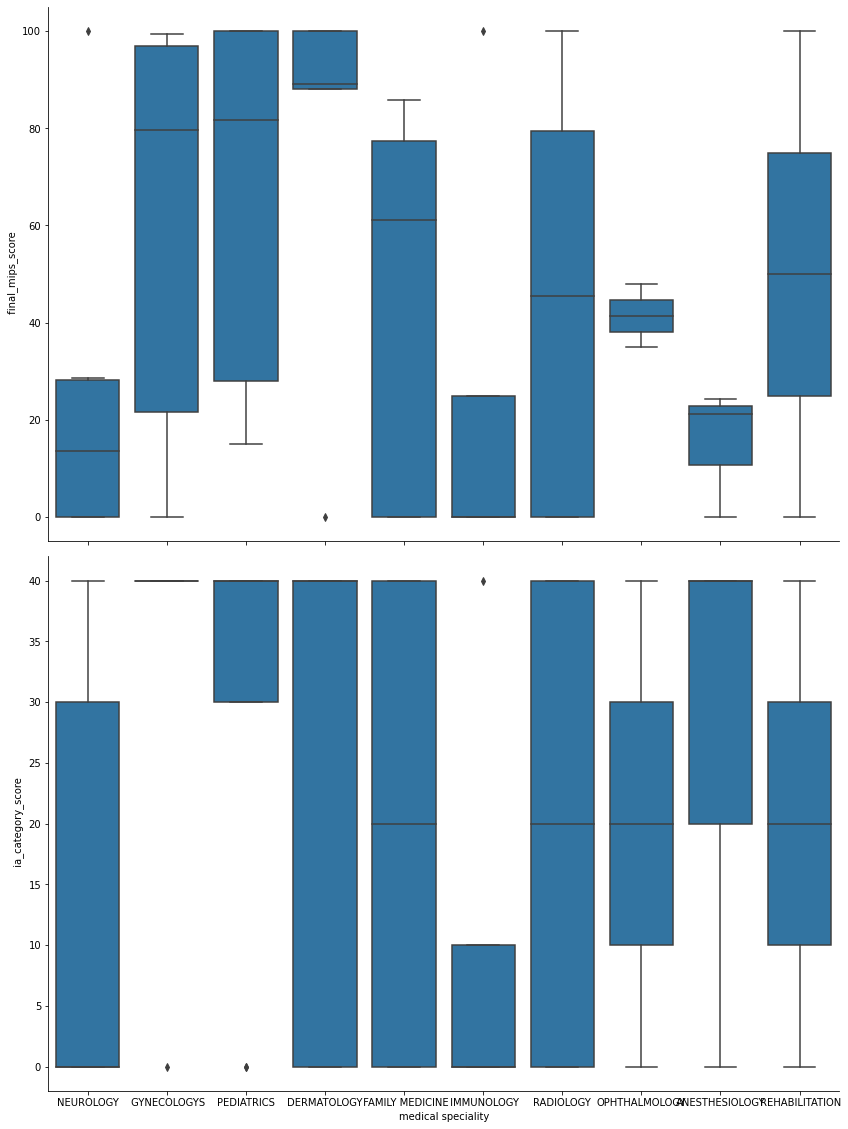

In [17]:
#Plotting relation between categorial and numrical variables
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
plt.figure(figsize = [25, 25])
bimap = sb.PairGrid(data = clean_data.head(50) , y_vars = [' final_mips_score',' ia_category_score'], x_vars = 'medical speciality',size =8,aspect = 1.5)
bimap.map(boxgrid)
plt.show();

**Certain specialties need more improvement activities compare to others as the mean falls way below 40 as it is the minimum score for applying improvement activities  and that aligns with the final mips scores in a way the mean falls way below 80.**



## Multivariate Exploration

C:\Users\Sundus.Housah\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


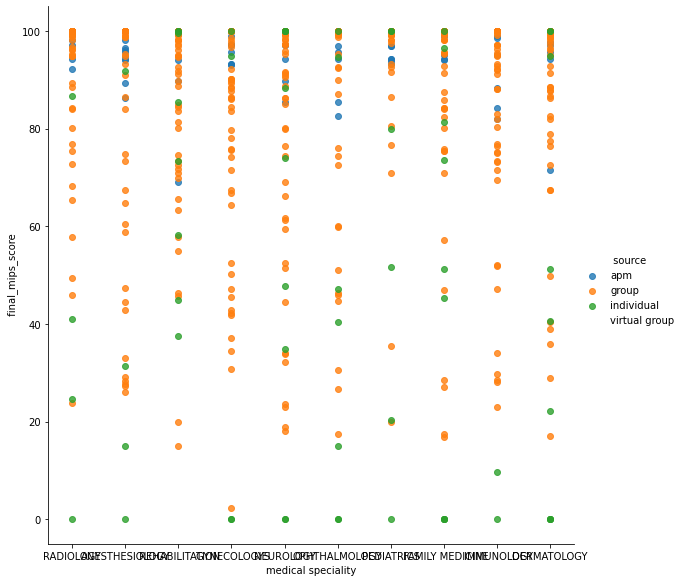

In [18]:
# Investigating relation between source,idical speciality and mips score
multimap=clean_data.sample(1000)
sb.lmplot(x='medical speciality', y=' final_mips_score', hue=' source', 
           data=multimap.loc[multimap[' source'].isin(['apm', 'group', 'individual', 'virtual group'])],size=8, 
           fit_reg=False);

**The above plot shows clearly that apm source actually have highest scores as all are above 70 where individuals reached the lowest as they are the only source that registered 0. I decided to neglect the individual group as the overall count for this source is only 4 in the original data. This plot also gives us a close understanding that all medical specialties performances are close and only individuals who apply apm standards will perform with high quality regardless of the specialty.**

## Conclusion 

**The dataset investigated is about clinicians performances in the practice, the aim of this exploratory process is to answer the following questions 'What medical specialties need improvement activities according to quality_category_score?' and 'Is applying mips standards affective in improving the mips score?' and the results showed that NEUROLOGY,DERMATOLOGY and  IMMUNOLOGY have the lowest mean compare to other medical specialties. On the other hand applying mips standards is very effective in raising the performance quality as the apm sources all have 100 scores.**
 
